# Graded Challenge 4

By: Maheswara Sinatriyo

Batch: HCK-001

## Problem Statement

Create a clustering model to perform Customer Segmentation from the credit card data of a bank below. This data is data on credit card usage information for the last 6 months.

**Conceptual Problem**
1. What is meant by inertia in the K-Means algorithm?
2. Explain what is meant by the Elbow Method (reason for use, how to use it, weaknesses/strengths, etc.) !
3. Explain the difference between each clustering algorithm that you use in this case!


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from statsmodels.stats.outliers_influence import variance_inflation_factor 

# from clusteval import clusteval

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Loading

**QUERY**

select * from `ftds-hacktiv8-project.phase1_ftds_001_hck.credit-card-information`
where mod(CUST_ID,2) <> 0;

In [2]:
# Data loading
df = pd.read_csv('credit_info.csv')
# Original backup
df_original = df.copy()
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


## EDA

In [3]:
# General overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

since we are doing unsupervised learning, we will be dropping ID because it will have 0 relation with our labeling.

In [4]:
# Null checking
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are some nulls in minimum payments column

In [5]:
df.fillna(0,inplace=True)

In [6]:
# duplicated check
df.duplicated().sum()

0

In [7]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,843.704936,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2399.621735,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,162.761527,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,290.977264,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,785.953474,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


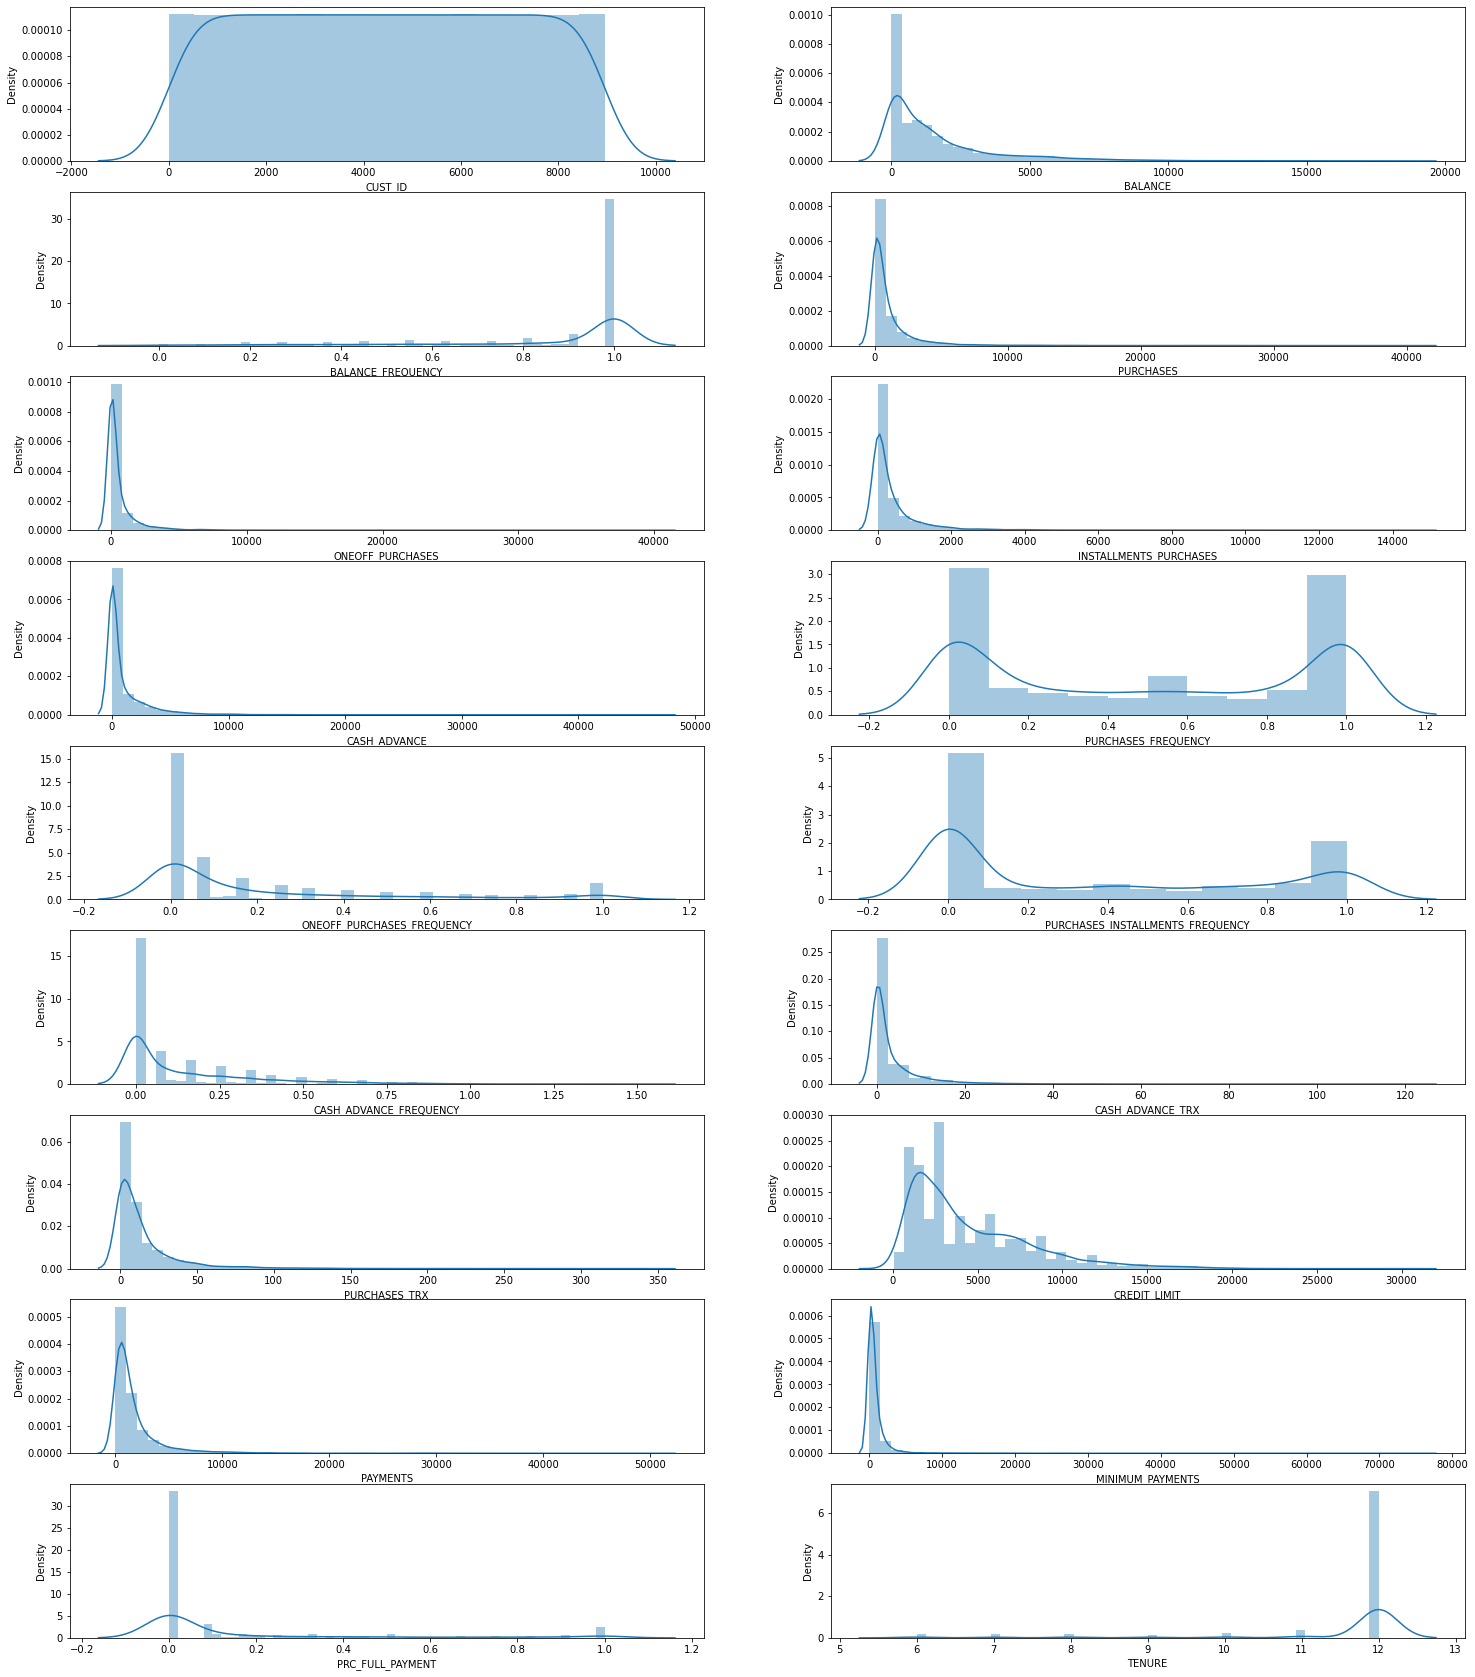

In [8]:
# distributions

plt.figure(figsize=(25,30))

for i,columns in enumerate(df.columns):

    ax = plt.subplot(9, 2, i+1)
    sns.distplot(df[columns],ax=ax)
    plt.xlabel(columns)

based on the distribution plots, most of the data are skewed. 

## Data Preprocessing

### Data Inference

In [9]:
# Inference dataframe

ndf, df_inference = train_test_split(df, test_size=0.25, random_state=99)

In [10]:
# Dataframe without Inference
ndf = df.drop(df_inference.index)
ndf.reset_index(inplace=True,drop=True)
ndf_copy = ndf.copy()
ndf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,0.000000,0.00,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.0,0.000000,0.000000,0.00,8
2,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,3029.380326,85.428885,0.00,8
3,7755,440.613643,1.000000,600.00,600.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.316424,137.846006,0.00,8
4,8299,611.561026,1.000000,765.00,765.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2000.0,204.464151,146.352314,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
3352,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
3353,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
3354,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11


In [11]:
# Drop index
df_inference.reset_index(inplace=True,drop=True)
ndf.reset_index(inplace=True,drop=True)
df_inference

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,7079,105.216147,1.000000,1445.55,1135.55,310.00,0.000000,1.000000,1.000000,0.416667,0.000000,0,32,13500.0,1267.655533,179.377143,0.900000,12
1,3147,3188.470340,1.000000,0.00,0.00,0.00,1673.752340,0.000000,0.000000,0.000000,0.083333,1,0,4500.0,715.120330,1220.498390,0.000000,12
2,5451,4766.360515,1.000000,2894.04,2583.82,310.22,1386.851165,1.000000,1.000000,0.416667,0.166667,2,34,20000.0,1302.793390,1245.948419,0.000000,12
3,8821,1396.214811,1.000000,3729.35,2489.35,1240.00,536.658419,1.000000,1.000000,0.583333,0.250000,4,45,2500.0,1550.474014,363.926512,0.000000,12
4,3893,34.017341,0.272727,494.60,494.60,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4000.0,456.293143,19.131945,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,8769,452.094148,1.000000,5073.53,4752.26,321.27,0.000000,1.000000,1.000000,0.666667,0.000000,0,54,7000.0,3923.560419,176.275371,1.000000,12
1115,3619,130.644698,1.000000,338.79,0.00,338.79,0.000000,0.916667,0.000000,0.916667,0.000000,0,19,1500.0,196.798460,176.914811,0.083333,12
1116,4557,477.818040,1.000000,515.60,515.60,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,7500.0,610.621157,277.826134,0.000000,12
1117,7665,1679.429188,1.000000,0.00,0.00,0.00,75.844786,0.000000,0.000000,0.000000,0.166667,2,0,1800.0,243.503331,4511.435479,0.000000,12


### Null handling

we will be changing the nulls to 0

In [12]:
ndf.fillna(0,inplace=True)
ndf.reset_index(inplace=True,drop=True)

In [13]:
ndf.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

### Feature Selection

In [14]:
# drop CUST_ID
ndf.drop('CUST_ID', axis=1, inplace=True)

### Outlier Handling

In [15]:
ndf.skew()

BALANCE                              2.306000
BALANCE_FREQUENCY                   -1.980763
PURCHASES                            7.065231
ONEOFF_PURCHASES                     9.979627
INSTALLMENTS_PURCHASES               6.083020
CASH_ADVANCE                         5.966910
PURCHASES_FREQUENCY                  0.066081
ONEOFF_PURCHASES_FREQUENCY           1.557274
PURCHASES_INSTALLMENTS_FREQUENCY     0.513545
CASH_ADVANCE_FREQUENCY               1.793437
CASH_ADVANCE_TRX                     6.705714
PURCHASES_TRX                        4.338814
CREDIT_LIMIT                         1.495632
PAYMENTS                             5.250857
MINIMUM_PAYMENTS                    14.904947
PRC_FULL_PAYMENT                     1.989283
TENURE                              -2.924434
dtype: float64

there are a lot of extreme outliers, will be handled using winsorizer for all columns except for PURCHSAE_INSTALLMENT_FREQUENCY and PURCHASE_FREQUENCY

In [16]:
# winsorizer
winsorizer = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'])

winsorizer.fit(ndf)

X = winsorizer.transform(ndf)

### Feature Scaling

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
scaled_data = scaler.transform(X)

In [20]:
X_scaled = pd.DataFrame(scaled_data)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.803497,-2.257709,-0.686754,-0.553282,-0.663637,-0.615942,-0.901970,-0.254228,-0.917373,-0.679488,-0.632301,-0.714039,-1.119000,-0.905162,-0.867161,-0.593626,-2.683844
1,-0.805499,-2.257709,-0.574855,-0.366441,-0.663637,-0.615942,-0.901970,-0.254228,-0.917373,-0.679488,-0.632301,-0.714039,0.678517,-0.905162,-0.867161,-0.593626,-2.683844
2,-0.667352,-2.257709,0.256904,1.022383,-0.663637,-0.615942,-0.901970,-0.254228,-0.917373,-0.679488,-0.632301,-0.714039,-0.925421,0.869805,-0.747623,-0.593626,-2.683844
3,-0.575426,0.572180,-0.212790,0.238115,-0.663637,-0.615942,-0.901970,-0.254228,-0.917373,-0.679488,-0.632301,-0.714039,-0.980729,-0.779004,-0.674277,-0.593626,-2.683844
4,-0.486164,0.572180,-0.071881,0.473395,-0.663637,-0.615942,-0.901970,-0.254228,-0.917373,-0.679488,-0.632301,-0.714039,-0.704188,-0.785363,-0.662375,-0.593626,-2.683844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,-0.212475,0.572180,-0.646556,-0.617450,-0.485695,-0.556466,-0.534854,-0.674362,-0.457919,0.661919,0.032764,-0.596133,-0.925421,-0.696694,-0.258914,-0.593626,-0.395097
3352,-0.708384,-2.257709,-0.313355,-0.058139,-0.489695,0.043577,-0.534854,-0.063258,-0.687646,0.661919,1.141206,-0.301369,-0.925421,0.462368,-0.642018,0.890717,-0.395097
3353,-0.114771,0.572180,-0.725183,-0.617450,-0.663637,-0.059704,-1.212607,-0.674362,-0.917373,2.003330,1.806271,-0.772992,-0.842459,-0.298370,-0.429420,-0.593626,-0.395097
3354,-0.251801,0.572180,-0.725183,-0.617450,-0.663637,0.460966,-1.212607,-0.674362,-0.917373,2.003330,1.584583,-0.772992,-0.704188,-0.666482,-0.479445,-0.593626,-0.395097


### VIF

In [21]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF Scores"] = [variance_inflation_factor(X_scaled.values, i) for i in range(len(X_scaled.columns))] 

display(vif_data)


,feature,VIF Scores
0,BALANCE,5.083456
1,BALANCE_FREQUENCY,1.389541
2,PURCHASES,21.446313
3,ONEOFF_PURCHASES,12.677438
4,INSTALLMENTS_PURCHASES,7.490637
5,CASH_ADVANCE,3.594245
6,PURCHASES_FREQUENCY,11.162211
7,ONEOFF_PURCHASES_FREQUENCY,5.657132
8,PURCHASES_INSTALLMENTS_FREQUENCY,11.908161
9,CASH_ADVANCE_FREQUENCY,6.804177


Based on the VIF, if we look at a treshold 10, and there seems to be 4 columns that are above that treshold. We could set our PCA components to 4, but we must confirm it using EVR and CEV

### PCA

In [22]:
pca = PCA(n_components=17).fit(X_scaled)
pca.explained_variance_ratio_

array([0.30465977, 0.24071157, 0.0877356 , 0.07738246, 0.06200329,
       0.05132092, 0.04159725, 0.03278341, 0.0269958 , 0.02207349,
       0.01380153, 0.01342831, 0.00938342, 0.00756887, 0.00447197,
       0.00259665, 0.00148568])

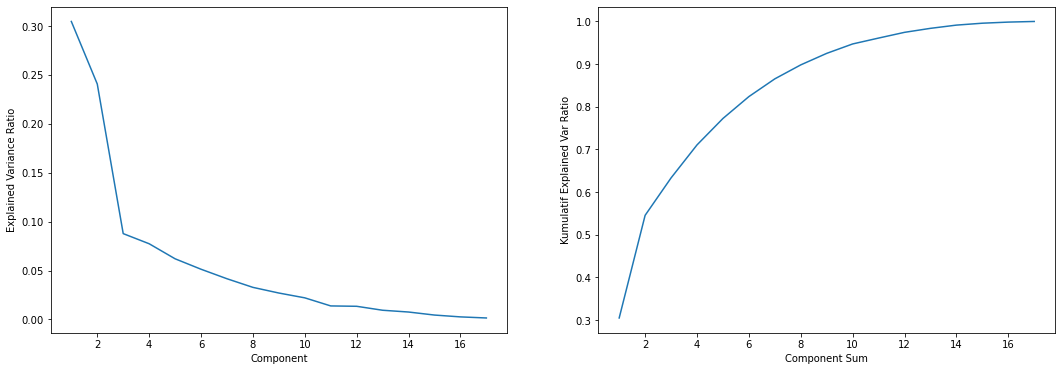

In [23]:
fig,ax=plt.subplots(ncols=2, figsize=(18, 6))
ax[0].plot(range(1,18), pca.explained_variance_ratio_)
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Component Sum')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

based on the EVR, best component seems to be either 3 or around 11 component. If we look at the CEV, 3 components is around 65% which not good enough, but 11 components is around 95%, which is good enough. Thus we will be using a value of 0.95 for the component

In [24]:
pca = PCA(n_components=0.95).fit(X_scaled)

In [25]:
pca.explained_variance_ratio_

array([0.30465977, 0.24071157, 0.0877356 , 0.07738246, 0.06200329,
       0.05132092, 0.04159725, 0.03278341, 0.0269958 , 0.02207349,
       0.01380153])

In [26]:
pca.fit(X_scaled)

PCA(n_components=0.95)

In [27]:
df_pca = pca.transform(X_scaled)

### PCA 2

In [28]:
pca2 = PCA(n_components=2).fit(X_scaled)

In [29]:
pca2.explained_variance_ratio_

array([0.30465977, 0.24071157])

In [30]:
pca2.fit(X_scaled)

PCA(n_components=2)

In [31]:
df_pca2 = pca.transform(X_scaled)

## Model Definition

Algorithm : K-Means Clustering, DBSCAN, and Gaussian Mixture

## Model Training

### K means

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(
c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(
c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(
c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Win

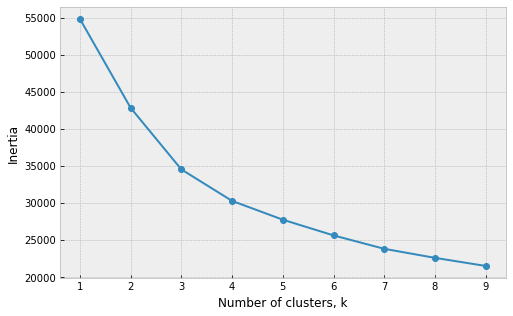

In [32]:
#check the optimal k value with base params (Algo: lloyd)
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k,algorithm='lloyd')
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

it seems that based on the elbow, the best k value is 3 or 4

In [33]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=99).fit(df_pca)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(
c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(
c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(
c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Win

In [34]:
silhouette_scores = [silhouette_score(df_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

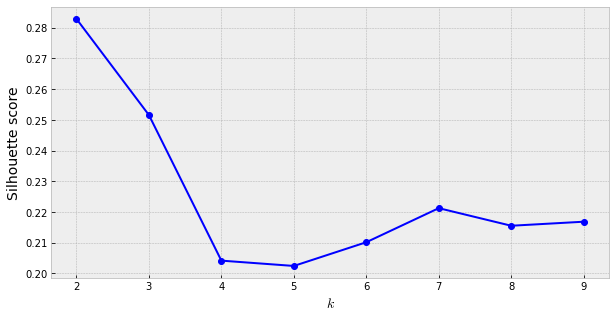

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

based on the sihoulette score, 2 cluster has the highest score, but 3 cluster is also quite good

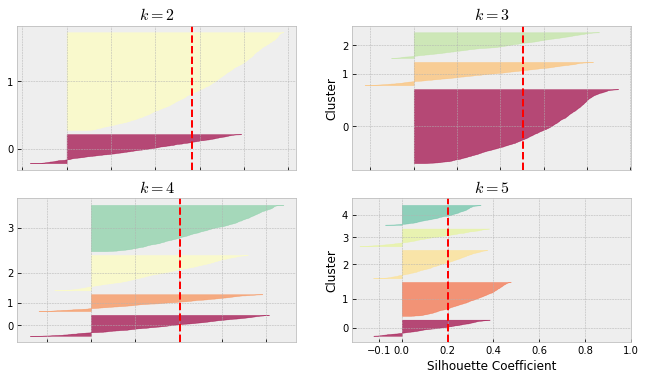

In [36]:
plt.figure(figsize=(11, 9))

for k in (2,3,4,5):
    plt.subplot(3,2,k-1)

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(df_pca, y_pred)

    padding = len(df_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = pl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
    if k in (5,10):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)

plt.show()

Based on the silhouette visualization, all of these k value have their clusters above the mean silhouette score. with k=2 the cluster are far heavier on one side, k=3 is roughly the same but with extra cluster to seperate and makes the cluster size more even.

Overall from elbow and silhoulette we will be using 3 clusters.

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


inertia :  34505.29051278701


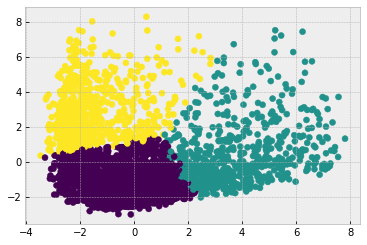

In [37]:
kmeans_lloyd = KMeans(n_clusters=3,algorithm='lloyd',random_state=99)

kmeans_lloyd.fit(df_pca)

print('inertia : ', kmeans_lloyd.inertia_)

labels_kmc_lloyd = kmeans_lloyd.labels_
labels_kmc_lloyd

plt.scatter(df_pca2[:,0],df_pca2[:,1],c=labels_kmc_lloyd,cmap='viridis')

#### K Means Algo elkan

inertia :  34505.29051278701


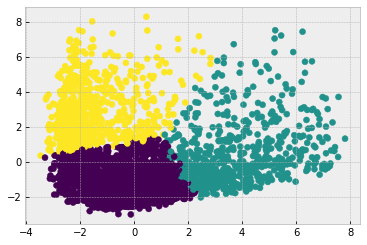

In [38]:
kmeans_elkan = KMeans(n_clusters=3,algorithm='elkan',random_state=99)

kmeans_elkan.fit(df_pca)

print('inertia : ', kmeans_elkan.inertia_)

labels_kmc_elkan = kmeans_elkan.labels_
labels_kmc_elkan

plt.scatter(df_pca2[:,0],df_pca2[:,1],c=labels_kmc_elkan,cmap='viridis')

It seems that based on visualization alone, there is no difference between Lloyd algorithm and Elkan algorithm for this dataset

### DBSCAN

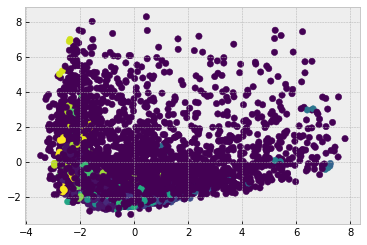

In [39]:
# DBSCAN auto
DBSCAN_auto = DBSCAN(eps=0.5, min_samples=2,algorithm='auto').fit(df_pca)
labels_DBSCAN_auto = DBSCAN_auto.labels_
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=labels_DBSCAN_auto, s=40, cmap='viridis');

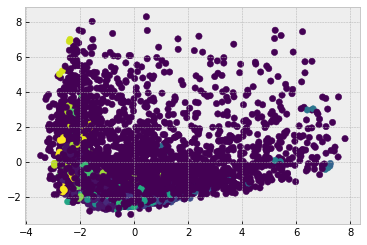

In [40]:
# DBSCAN ball tree
DBSCAN_ball = DBSCAN(eps=0.5, min_samples=2,algorithm='ball_tree').fit(df_pca)
labels_DBSCAN_ball = DBSCAN_ball.labels_
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=labels_DBSCAN_ball, s=40, cmap='viridis');

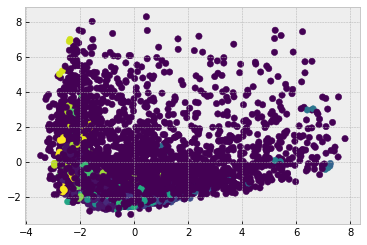

In [41]:
# DBSCAN kd tree
DBSCAN_kd = DBSCAN(eps=0.5, min_samples=2,algorithm='kd_tree').fit(df_pca)
labels_DBSCAN_kd = DBSCAN_kd.labels_
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=labels_DBSCAN_kd, s=40, cmap='viridis');

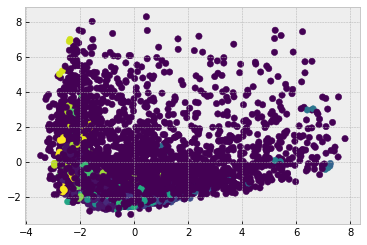

In [42]:
# DBSCAN brute
DBSCAN_brute = DBSCAN(eps=0.5, min_samples=2,algorithm='brute').fit(df_pca)
labels_DBSCAN_brute = DBSCAN_brute.labels_
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=labels_DBSCAN_brute, s=40, cmap='viridis');

Changing algorithm does not change a things, likely because the data are too close with each other thus DBSCAN can't label properly

### Gaussian Mixture

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


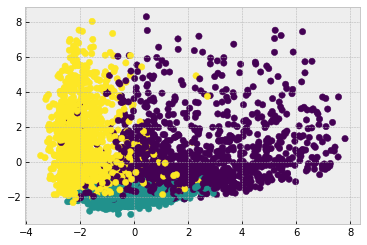

In [43]:
# Gaussian Covariance full
gmm_full = GaussianMixture(n_components=3,covariance_type='full').fit(df_pca)
labels_gmm_full = gmm_full.predict(df_pca)
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=labels_gmm_full, s=40, cmap='viridis');

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


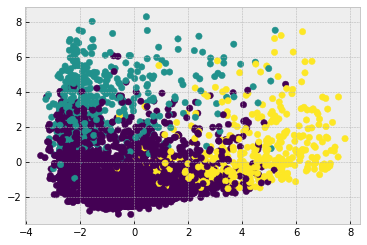

In [44]:
# Gaussian Covariance tied
gmm_tied = GaussianMixture(n_components=3,covariance_type='tied').fit(df_pca)
labels_gmm_tied = gmm_tied.predict(df_pca)
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=labels_gmm_tied, s=40, cmap='viridis');

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


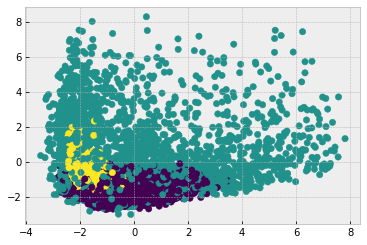

In [45]:
# Gaussian Covariance diag
gmm_diag = GaussianMixture(n_components=3,covariance_type='diag').fit(df_pca)
labels_gmm_diag = gmm_diag.predict(df_pca)
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=labels_gmm_diag, s=40, cmap='viridis');

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


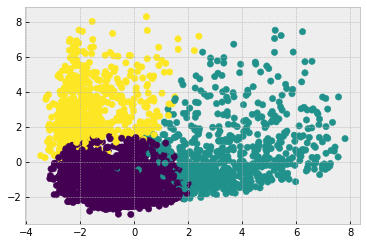

In [46]:
# Gaussian Covariance spherical
gmm_spher = GaussianMixture(n_components=3,covariance_type='spherical').fit(df_pca)
labels_gmm_spher = gmm_spher.predict(df_pca)
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], c=labels_gmm_spher, s=40, cmap='viridis');

Based on visualization alone, GMM Spherical has the better clustering out of the others covariance type. With Diag being the wors't covariant type of GMM for this dataset.

### Overall Model Analysis

In [47]:
comparison = pd.DataFrame({'Method' : ['K-Means Lloyd', 'K-Means Elkan', 'DBSCAN Auto', 'DBSCAN Ball Tree', 'DBSCAN KD Tree', 'DBSCAN Brute','Gaussian Mixture Full', 'Gaussian Mixture Tied', 'Gaussian Mixture Diag','Gaussian Mixture Sphere'],
                  'Silhouette Score' : [silhouette_score(df_pca, labels_kmc_lloyd), silhouette_score(df_pca, labels_kmc_elkan), silhouette_score(df_pca, labels_DBSCAN_auto), silhouette_score(df_pca, labels_DBSCAN_ball),  silhouette_score(df_pca, labels_DBSCAN_kd), silhouette_score(df_pca, labels_DBSCAN_brute), silhouette_score(df_pca, labels_gmm_full), silhouette_score(df_pca, labels_gmm_tied), silhouette_score(df_pca, labels_gmm_diag),silhouette_score(df_pca, labels_gmm_spher)]
                  })
comparison

,Method,Silhouette Score
0,K-Means Lloyd,0.251566
1,K-Means Elkan,0.251566
2,DBSCAN Auto,-0.429636
3,DBSCAN Ball Tree,-0.429636
4,DBSCAN KD Tree,-0.429636
5,DBSCAN Brute,-0.429636
6,Gaussian Mixture Full,0.118454
7,Gaussian Mixture Tied,0.240474
8,Gaussian Mixture Diag,-0.007258
9,Gaussian Mixture Sphere,0.253387


apparently changing the algorithm of K-means does not change the silhouette score at all, and for DBSCAN all algorithm result in the same score as well. Gaussian Mixture covariance types affects the clustering of the dataset, which can be seen for GMM the best covariance is sphere. But overall, K-means has the best silhouette score, thus we will be using the base Lloyd algorithm since it does not change with Elkan algorithm.

### Concat

In [48]:
# Check Final Label
labels_concat = pd.DataFrame(labels_kmc_lloyd,columns=['Category'])
labels_concat

,Category
0,0
1,0
2,0
3,0
4,0
...,...
3351,0
3352,0
3353,2
3354,2


In [49]:
df_concat = pd.concat([ndf_copy,labels_concat], axis=1)
df_concat

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Category
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,0.000000,0.00,8,0
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.0,0.000000,0.000000,0.00,8,0
2,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,3029.380326,85.428885,0.00,8,0
3,7755,440.613643,1.000000,600.00,600.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.316424,137.846006,0.00,8,0
4,8299,611.561026,1.000000,765.00,765.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2000.0,204.464151,146.352314,0.00,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11,0
3352,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11,0
3353,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11,2
3354,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11,2


## Model Inference

In [50]:
# show inference
df_inference

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,7079,105.216147,1.000000,1445.55,1135.55,310.00,0.000000,1.000000,1.000000,0.416667,0.000000,0,32,13500.0,1267.655533,179.377143,0.900000,12
1,3147,3188.470340,1.000000,0.00,0.00,0.00,1673.752340,0.000000,0.000000,0.000000,0.083333,1,0,4500.0,715.120330,1220.498390,0.000000,12
2,5451,4766.360515,1.000000,2894.04,2583.82,310.22,1386.851165,1.000000,1.000000,0.416667,0.166667,2,34,20000.0,1302.793390,1245.948419,0.000000,12
3,8821,1396.214811,1.000000,3729.35,2489.35,1240.00,536.658419,1.000000,1.000000,0.583333,0.250000,4,45,2500.0,1550.474014,363.926512,0.000000,12
4,3893,34.017341,0.272727,494.60,494.60,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4000.0,456.293143,19.131945,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,8769,452.094148,1.000000,5073.53,4752.26,321.27,0.000000,1.000000,1.000000,0.666667,0.000000,0,54,7000.0,3923.560419,176.275371,1.000000,12
1115,3619,130.644698,1.000000,338.79,0.00,338.79,0.000000,0.916667,0.000000,0.916667,0.000000,0,19,1500.0,196.798460,176.914811,0.083333,12
1116,4557,477.818040,1.000000,515.60,515.60,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,7500.0,610.621157,277.826134,0.000000,12
1117,7665,1679.429188,1.000000,0.00,0.00,0.00,75.844786,0.000000,0.000000,0.000000,0.166667,2,0,1800.0,243.503331,4511.435479,0.000000,12


### Null Handling

In [51]:
# null check
df_inference.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [52]:
# null handling
df_inference.fillna(0,inplace=True)
# reset index
df_inference.reset_index(inplace=True,drop=True)
df_inf_copy = df_inference.copy()

### Feature Selection

In [53]:
# Drop ID
df_inference.drop('CUST_ID',axis=1,inplace=True)

### Outlier Handling

In [54]:
# winsorizer
winsorizer = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'])

winsorizer.fit(df_inference)

X_inference = winsorizer.transform(df_inference)

### Inference Scaling

In [55]:
scaled_data_inference = scaler.transform(X_inference)

In [56]:
X_scaled_inference = pd.DataFrame(scaled_data_inference, columns=df_inference.columns)
X_scaled_inference

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.750559,0.572180,0.509301,1.001778,-0.064504,-0.615942,1.272489,2.686710,0.135546,-0.679488,-0.632301,1.113499,2.476033,-0.162420,-0.616164,3.364630,0.367818
1,0.859405,0.572180,-0.725183,-0.617450,-0.663637,0.605366,-1.212607,-0.674362,-0.917373,-0.269615,-0.410612,-0.772992,-0.012836,-0.486160,0.840643,-0.593626,0.367818
2,1.683323,0.572180,1.746296,2.567333,-0.064079,0.396019,1.272489,2.686710,0.135546,0.140263,-0.188924,1.231405,4.135279,-0.141832,0.876254,-0.593626,0.367818
3,-0.076446,0.572180,2.459641,2.567333,1.732895,-0.224352,1.272489,2.686710,0.556711,0.550136,0.254453,1.879886,-0.565918,0.003288,-0.357930,-0.593626,0.367818
4,-0.787736,-1.485919,-0.302800,0.087821,-0.663637,-0.615942,-1.005517,-0.394273,-0.917373,-0.679488,-0.632301,-0.714039,-0.151106,-0.637812,-0.840390,-0.593626,0.367818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,-0.569431,0.572180,2.706956,2.567333,-0.042723,-0.615942,1.272489,2.686710,0.767297,-0.679488,-0.632301,2.410461,0.678517,1.393721,-0.620504,3.364630,0.367818
1115,-0.737281,0.572180,-0.435860,-0.617450,-0.008862,-0.615942,1.065398,-0.674362,1.399048,-0.679488,-0.632301,0.347112,-0.842459,-0.789854,-0.619610,-0.098847,0.367818
1116,-0.555999,0.572180,-0.284866,0.117766,-0.663637,-0.615942,-0.384243,0.445995,-0.917373,-0.679488,-0.632301,-0.478228,0.816787,-0.547388,-0.478408,-0.593626,0.367818
1117,0.071439,0.572180,-0.725183,-0.617450,-0.663637,-0.560599,-1.212607,-0.674362,-0.917373,0.140263,-0.188924,-0.772992,-0.759497,-0.762489,2.813649,-0.593626,0.367818


### Inference PCA

In [57]:
df_pca_inf = pca.transform(X_scaled_inference)

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


### Inference Model Application

In [58]:
kmeans_inf = KMeans(n_clusters=3,algorithm='lloyd',random_state=99)

kmeans_inf.fit(df_pca_inf)

labels_kmc_inf = kmeans_inf.labels_
labels_kmc_inf

c:\Users\mahes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


array([0, 2, 0, ..., 1, 1, 1])

### Concat

In [59]:
# Check Inference Label
labels_concat_inf = pd.DataFrame(labels_kmc_inf,columns=['Category'])
labels_concat_inf

,Category
0,0
1,2
2,0
3,0
4,1
...,...
1114,0
1115,1
1116,1
1117,1


In [60]:
df_concat_inf = pd.concat([df_inf_copy,labels_concat_inf], axis=1)
df_concat_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Category
0,7079,105.216147,1.000000,1445.55,1135.55,310.00,0.000000,1.000000,1.000000,0.416667,0.000000,0,32,13500.0,1267.655533,179.377143,0.900000,12,0
1,3147,3188.470340,1.000000,0.00,0.00,0.00,1673.752340,0.000000,0.000000,0.000000,0.083333,1,0,4500.0,715.120330,1220.498390,0.000000,12,2
2,5451,4766.360515,1.000000,2894.04,2583.82,310.22,1386.851165,1.000000,1.000000,0.416667,0.166667,2,34,20000.0,1302.793390,1245.948419,0.000000,12,0
3,8821,1396.214811,1.000000,3729.35,2489.35,1240.00,536.658419,1.000000,1.000000,0.583333,0.250000,4,45,2500.0,1550.474014,363.926512,0.000000,12,0
4,3893,34.017341,0.272727,494.60,494.60,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4000.0,456.293143,19.131945,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,8769,452.094148,1.000000,5073.53,4752.26,321.27,0.000000,1.000000,1.000000,0.666667,0.000000,0,54,7000.0,3923.560419,176.275371,1.000000,12,0
1115,3619,130.644698,1.000000,338.79,0.00,338.79,0.000000,0.916667,0.000000,0.916667,0.000000,0,19,1500.0,196.798460,176.914811,0.083333,12,1
1116,4557,477.818040,1.000000,515.60,515.60,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,7500.0,610.621157,277.826134,0.000000,12,1
1117,7665,1679.429188,1.000000,0.00,0.00,0.00,75.844786,0.000000,0.000000,0.000000,0.166667,2,0,1800.0,243.503331,4511.435479,0.000000,12,1


### Final Dataframe

In [61]:
df_concat.shape

(3356, 19)

In [62]:
df_final = pd.concat([df_concat,df_concat_inf])
df_final

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Category
0,3091,3.833185,0.125,45.00,45.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.000000,0.000000,0.000000,8,0
1,5069,0.000000,0.000,176.03,176.03,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,7000.0,0.000000,0.000000,0.000000,8,0
2,6291,264.566591,0.375,1150.00,1150.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,3029.380326,85.428885,0.000000,8,0
3,7755,440.613643,1.000,600.00,600.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.316424,137.846006,0.000000,8,0
4,8299,611.561026,1.000,765.00,765.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2000.0,204.464151,146.352314,0.000000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,8769,452.094148,1.000,5073.53,4752.26,321.27,0.000000,1.000000,1.000000,0.666667,0.000000,0,54,7000.0,3923.560419,176.275371,1.000000,12,0
1115,3619,130.644698,1.000,338.79,0.00,338.79,0.000000,0.916667,0.000000,0.916667,0.000000,0,19,1500.0,196.798460,176.914811,0.083333,12,1
1116,4557,477.818040,1.000,515.60,515.60,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,5,7500.0,610.621157,277.826134,0.000000,12,1
1117,7665,1679.429188,1.000,0.00,0.00,0.00,75.844786,0.000000,0.000000,0.000000,0.166667,2,0,1800.0,243.503331,4511.435479,0.000000,12,1


## Final EDA

In [63]:
# General overview
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4475 entries, 0 to 1118
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [64]:
# Null checking
df_final.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Category                            0
dtype: int64

In [65]:
# duplicated check
df_final.duplicated().sum()

0

In [66]:
df_final.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Category
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,843.704936,0.150224,11.518212,0.702570
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2399.621735,0.289081,1.328925,0.790127
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,162.761527,0.000000,12.000000,0.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,290.977264,0.000000,12.000000,0.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,785.953474,0.125000,12.000000,1.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,2.000000


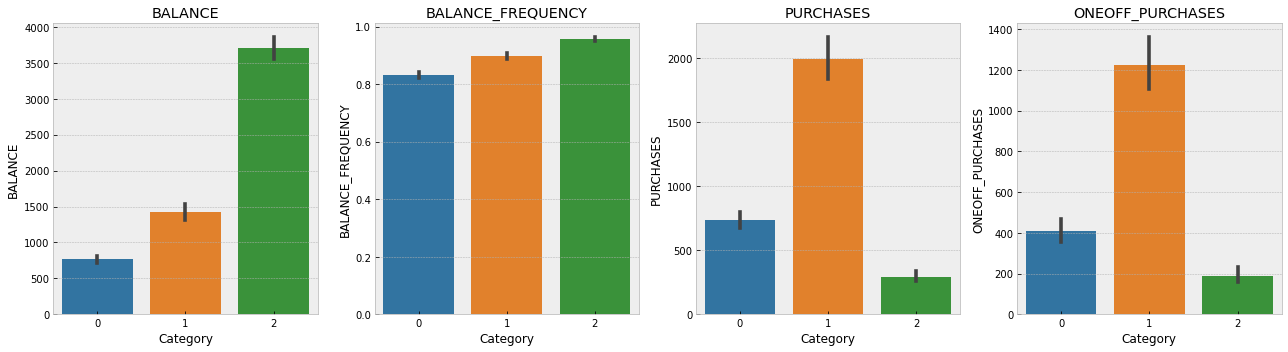

In [67]:
# Cluster Visualization
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.barplot(x = 'Category', y = 'BALANCE', data=df_final, palette="tab10")
plt.title('BALANCE')

plt.subplot(1,4,2)
sns.barplot(x = 'Category', y = 'BALANCE_FREQUENCY', data=df_final, palette="tab10")
plt.title('BALANCE_FREQUENCY')

plt.subplot(1,4,3)
sns.barplot(x = 'Category', y = 'PURCHASES', data=df_final, palette="tab10")
plt.title('PURCHASES')

plt.subplot(1,4,4)
sns.barplot(x = 'Category', y = 'ONEOFF_PURCHASES', data=df_final, palette="tab10")
plt.title('ONEOFF_PURCHASES')

plt.tight_layout()

plt.show()

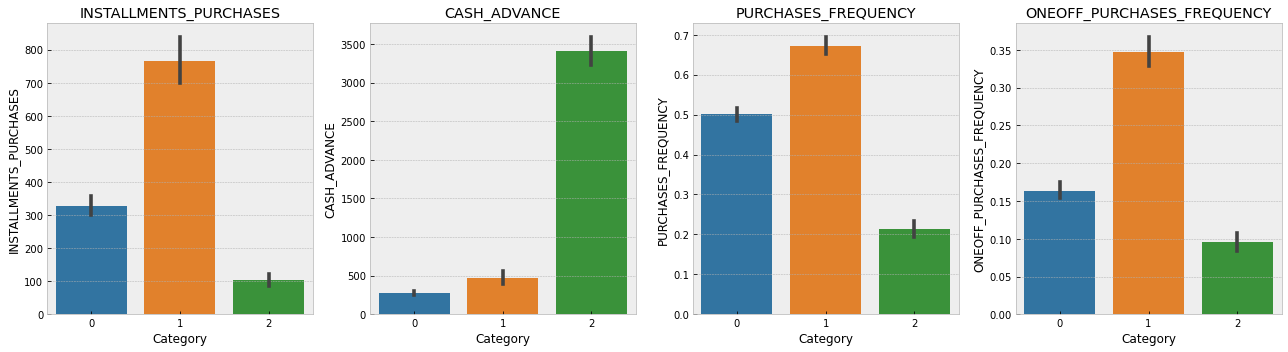

In [68]:
# Cluster Visualization
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.barplot(x = 'Category', y = 'INSTALLMENTS_PURCHASES', data=df_final, palette="tab10")
plt.title('INSTALLMENTS_PURCHASES')

plt.subplot(1,4,2)
sns.barplot(x = 'Category', y = 'CASH_ADVANCE', data=df_final, palette="tab10")
plt.title('CASH_ADVANCE')

plt.subplot(1,4,3)
sns.barplot(x = 'Category', y = 'PURCHASES_FREQUENCY', data=df_final, palette="tab10")
plt.title('PURCHASES_FREQUENCY')

plt.subplot(1,4,4)
sns.barplot(x = 'Category', y = 'ONEOFF_PURCHASES_FREQUENCY', data=df_final, palette="tab10")
plt.title('ONEOFF_PURCHASES_FREQUENCY')

plt.tight_layout()

plt.show()

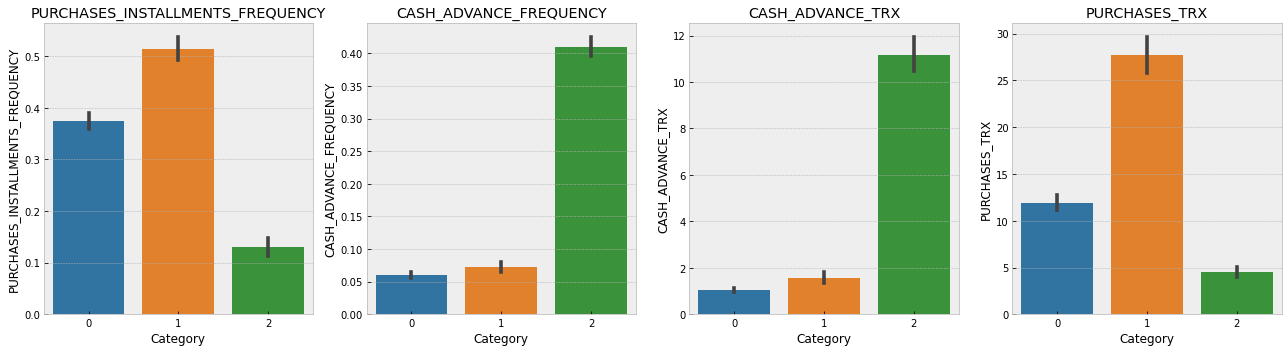

In [69]:
# Cluster Visualization
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.barplot(x = 'Category', y = 'PURCHASES_INSTALLMENTS_FREQUENCY', data=df_final, palette="tab10")
plt.title('PURCHASES_INSTALLMENTS_FREQUENCY')

plt.subplot(1,4,2)
sns.barplot(x = 'Category', y = 'CASH_ADVANCE_FREQUENCY', data=df_final, palette="tab10")
plt.title('CASH_ADVANCE_FREQUENCY')

plt.subplot(1,4,3)
sns.barplot(x = 'Category', y = 'CASH_ADVANCE_TRX', data=df_final, palette="tab10")
plt.title('CASH_ADVANCE_TRX')

plt.subplot(1,4,4)
sns.barplot(x = 'Category', y = 'PURCHASES_TRX', data=df_final, palette="tab10")
plt.title('PURCHASES_TRX')

plt.tight_layout()

plt.show()

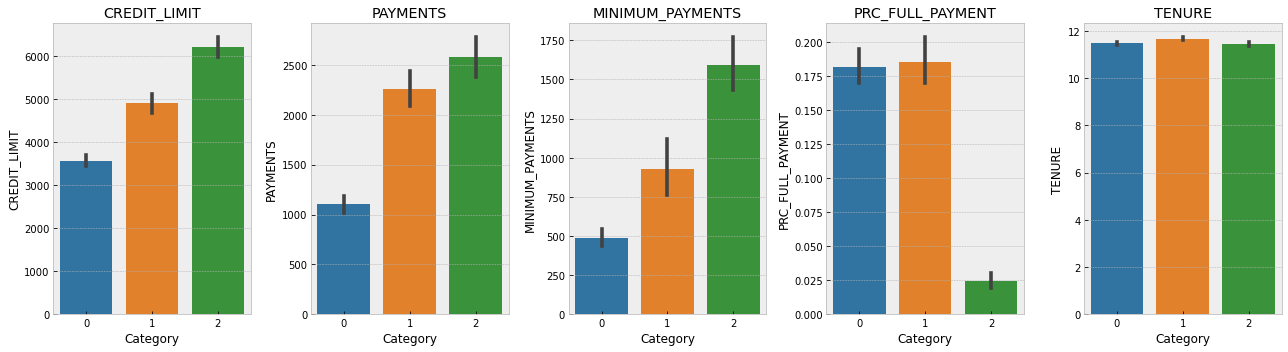

In [70]:
# Cluster Visualization
plt.figure(figsize=(18,5))
plt.subplot(1,5,1)
sns.barplot(x = 'Category', y = 'CREDIT_LIMIT', data=df_final, palette="tab10")
plt.title('CREDIT_LIMIT')

plt.subplot(1,5,2)
sns.barplot(x = 'Category', y = 'PAYMENTS', data=df_final, palette="tab10")
plt.title('PAYMENTS')

plt.subplot(1,5,3)
sns.barplot(x = 'Category', y = 'MINIMUM_PAYMENTS', data=df_final, palette="tab10")
plt.title('MINIMUM_PAYMENTS')

plt.subplot(1,5,4)
sns.barplot(x = 'Category', y = 'PRC_FULL_PAYMENT', data=df_final, palette="tab10")
plt.title('PRC_FULL_PAYMENT')

plt.subplot(1,5,5)
sns.barplot(x = 'Category', y = 'TENURE', data=df_final, palette="tab10")
plt.title('TENURE')

plt.tight_layout()

plt.show()

Based on the bar plots, Category 0 are the types of users that has low balance in general has low credit limit, does low payment and minimum payments.

Category 1 are like the middle class who done a lot of purchases and use installment method often.

Category 2 has the highest balance in general and does a lot of payment with cash in advance.

## Conclusion

In conlcusion, since we are doing unsupervised learning, we have to use PCA to recude the dimension. In this dataset, we use 95% and got 11 components. Then we try to find the best k value by using elbow and silhouette, and we found that 2 and 3 are the best option with 2 having higher silhouette score. But based on the silhouette visualization I choose to use 3 cluster.

In this notebook we are using 3 models with various hyperparameter. The model used are K-Means (Lloyd), K-Means (Elkan), DBSCAN all algorithm, and Gaussian Mixture all covariance. K means both resulted in the same silhouette score, DBSCAN score is also the same for all alrogirthm but the results are very bad, Gaussian Mixture has varying results with different covariance with Gaussian Spherical being the best cpvaroiance for this dataset. Overall K-Means has the best score, thus that's the one that is used.

On the final EDA we found out that Category 0 consist of low spender with low balance, while Category 1 has medium balance but high spending with installment, and Category 2 has the highest balance and pay in advance.

## Answer

1. (1) What is meant by inertia in the K-Means algorithm?
* Inertia is the sum of square distance between datapoints and its centroid. It is used to measure wether a datased is well clustered or not.
* Good model indicated by low k and low inertia
* Inertia is also used to find the best k value by using elbow method
Source: https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet
2. (2) Explain what is meant by the Elbow Method (reason for use, how to use it, weaknesses/strengths, etc.) !
* The elbow method is a way to identify which cluster are the best by looking at the bend of the graph, the more profound the bend, the better the cluster will be. But some datasets doesnt always present a profound bend on the graph, in that case it can be harder and ambigous to find the right k, and that is a weakness of elbow method.
3. (3) Explain the difference between each clustering algorithm that you use in this case!
* K-means recreates every piece of data in the dataset for just one of the newly generated clusters. A measure of distance or similarity is used to place a piece of data or a data point in the nearby cluster.
* DBSCAN is a density-based clustering algorithm. In geographical databases with noise, the technique converts regions with a sufficient high density into clusters and finds clusters of any structure. A cluster is described as the largest collection of densely connected points.
* Gaussian Mixture Model uses data points that are presumed to have a Gaussian (Normal) distribution. It is frequently referred to as a more complex iteration of K-Means. To define the location and shape of each cluster, two factors are needed: the mean and the covariance.
* Source: https://www.tutorialspoint.com/what-is-the-difference-between-k-means-and-dbscan
* Source: https://towardsdatascience.com/clustering-out-of-the-black-box-5e8285220717